In [1]:
import pandas
import numpy
import scipy
from scipy import stats
from config import datadir

import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
datadir / 'Drift Test ph and temp 06 12 2019 - 11'

WindowsPath('C:/Users/jarry/Google Drive/University/CSC411/CSC 2020 Webber J/Data/Drift Test ph and temp 06 12 2019 - 11')

# Test 1

In [3]:
skips1 = 0

In [6]:
test_1_data = pandas.read_csv(datadir / 'Drift Test ph and temp 06 12 2019 - 11', sep='	', header = None, 
                              usecols = [0, 1, 2, 3],
                              names = ["Date", "Time", "Temp", "pH"],
                              skiprows = skips1)

test_1_data = pandas.read_csv('Drift Test ph and temp 06 12 2019 - 09', sep='	', header = None, 
                              usecols = [0, 1, 2, 3],
                              names = ["Date", "Time", "Temp", "pH"],
                              skiprows = skips1)

In [7]:
test_1_data

,Date,Time,Temp,pH
0,2019/12/06,09:05:27 AM,23.663528,8.811172
1,2019/12/06,09:05:28 AM,23.728594,8.840874
2,2019/12/06,09:05:29 AM,23.745982,8.869581
3,2019/12/06,09:05:30 AM,23.771789,8.926380
4,2019/12/06,09:05:31 AM,23.800850,8.969278
...,...,...,...,...
441556,2019/12/11,11:47:56 AM,35.396296,15.749999
441557,2019/12/11,11:47:57 AM,35.396296,15.749999
441558,2019/12/11,11:47:58 AM,35.396119,15.749999
441559,2019/12/11,11:47:59 AM,35.396936,15.749999


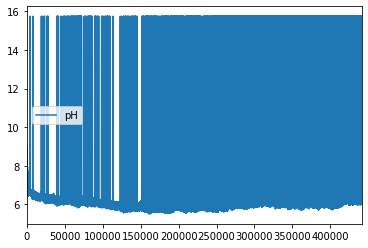

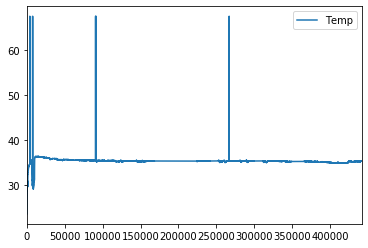

In [8]:
test_1_data.plot(y = "pH")
test_1_data.plot(y = "Temp")

In [ ]:
z1 = numpy.abs(stats.zscore(test_1_data.pH))
print(z1, len(z1))

In [ ]:
threshold = 1
print(numpy.where(z1 > threshold))

In [ ]:
test_1_data_trimmed = test_1_data[(z1 < threshold)]
test_1_data_trimmed

In [ ]:
test_1_data_trimmed.plot(y = "pH")
test_1_data_trimmed.plot(y = "Temp")

In [ ]:
rolling_window = 240

In [ ]:
test_1_data_trimmed.pH

In [ ]:
test_1_data_rolling = test_1_data_trimmed.rolling(rolling_window).mean().dropna()

In [ ]:
test_1_data_rolling

In [ ]:
test_1_data_rolling.plot(y = "pH")
test_1_data_rolling.plot(y = "Temp")

In [ ]:
x1 = numpy.arange(skips1,len(test_1_data_rolling.pH)+skips1)
order1 = 1

In [ ]:
x1_extended = numpy.arange(skips1,len(test_1_data.pH)+10000+skips1)

In [ ]:
test_1_ph_rolling_poly = numpy.poly1d(numpy.polyfit( x1, test_1_data_rolling.pH, order1))
print(test_1_ph_rolling_poly)

In [ ]:
fit_1_ph_poly = pandas.DataFrame(test_1_ph_rolling_poly(x1_extended))

In [ ]:
test_1_ph_comp = pandas.concat([test_1_data_rolling.pH,fit_1_ph_poly], axis = 1)
test_1_ph_comp.columns = ["Experimental", "Polyfit"]

In [ ]:
test_1_ph_comp.plot()

# Test 2

In [ ]:
skips2 = skips1

In [ ]:
test_2_data = pandas.read_csv('Drift Test 2 ph and temp 11 12 2019 - Finished', sep='	', header = None, 
                              usecols = [0, 1, 2, 3],
                              names = ["Date", "Time", "Temp", "pH"],
                              skiprows = skips2)

In [ ]:
test_2_data

In [ ]:
test_2_data.plot(y = "pH")
test_2_data.plot(y = "Temp")

In [ ]:
x2 = numpy.arange(skips2,len(test_2_data.pH)+skips2)
order2 = 1

In [ ]:
len(x2), len(test_2_data.pH)

In [ ]:
x2_extended = numpy.arange(skips2,len(test_2_data.pH)+10000+skips2)

In [ ]:
test_2_ph_poly = numpy.poly1d(numpy.polyfit( x2, test_2_data.pH, order2))
print(test_2_ph_poly)

In [ ]:
fit_2_ph_poly = pandas.DataFrame(test_2_ph_poly(x2_extended))

In [ ]:
test_2_ph_comp = pandas.concat([test_2_data.pH,fit_2_ph_poly], axis = 1)
test_2_ph_comp.columns = ["Experimental", "Polyfit"]

In [ ]:
test_2_ph_comp.plot()

## Noise Reduction
Reduce noise via rolling average

In [ ]:
rolling_window = 240

In [ ]:
test_2_data_rolling = test_2_data.rolling(rolling_window).mean().pH.dropna()
test_2_data_rolling

In [ ]:
test_2_ph_rolling_poly = numpy.poly1d(numpy.polyfit( x2[rolling_window-1:], test_2_data_rolling, order2))
print(test_2_ph_rolling_poly)

In [ ]:
fit_2_ph_rolling_poly = pandas.DataFrame(test_2_ph_rolling_poly(x2_extended))

In [ ]:
test_2_ph_comp_2 = pandas.concat([test_2_ph_comp, test_2_data_rolling, fit_2_ph_rolling_poly], axis = 1)
test_2_ph_comp_2.columns = ["Experimental", "Polyfit", "Moving Average","Fit after Noise Reduction"]

In [ ]:
test_2_ph_comp_2.plot()

In [ ]:
print(test_2_ph_rolling_poly)
print(test_2_ph_poly)

# Test 3

In [ ]:
skips3 = skips2
Nrows = 290000-skips3

In [ ]:
test_3_data = pandas.read_csv('Drift Test 3 ph and temp 17 12 2019 pH7 Buffer secondary rig', sep='	', header = None, 
                              usecols = [0, 1, 2, 3],
                              names = ["Date", "Time", "Temp", "pH"], nrows = Nrows, skiprows = skips3)

In [ ]:
test_3_data

In [ ]:
test_3_data.plot(y = "pH")
test_3_data.plot(y = "Temp")

In [ ]:
x3 = numpy.arange(skips3,len(test_3_data.pH)+skips3)
order3 = 1

In [ ]:
len(x3), len(test_3_data.pH)

In [ ]:
x3_extended = numpy.arange(skips3,len(test_3_data.pH)+10000+skips3)

In [ ]:
test_3_ph_poly = numpy.poly1d(numpy.polyfit( x3, test_3_data.pH, order3))
print(test_3_ph_poly)

In [ ]:
fit_3_ph_poly = pandas.DataFrame(test_3_ph_poly(x3_extended))

In [ ]:
test_3_ph_comp = pandas.concat([test_3_data.pH,fit_3_ph_poly], axis = 1)
test_3_ph_comp.columns = ["Experimental", "Polyfit"]

In [ ]:
test_3_ph_comp.plot()

## Noise Reduction
Reduce noise via rolling average

In [ ]:
rolling_window = 240

In [ ]:
test_3_data_rolling = test_3_data.rolling(rolling_window).mean().pH.dropna()
test_3_data_rolling

In [ ]:
test_3_ph_rolling_poly = numpy.poly1d(numpy.polyfit( x3[rolling_window-1:], test_3_data_rolling, order3))
print(test_3_ph_rolling_poly)

In [ ]:
fit_3_ph_rolling_poly = pandas.DataFrame(test_3_ph_rolling_poly(x3_extended))

In [ ]:
test_3_ph_comp_2 = pandas.concat([test_3_ph_comp, test_3_data_rolling, fit_3_ph_rolling_poly], axis = 1)
test_3_ph_comp_2.columns = ["Experimental", "Polyfit", "Moving Average","Fit after Noise Reduction"]

In [ ]:
test_3_ph_comp_2.plot()

In [ ]:
print(test_3_ph_rolling_poly)
print(test_3_ph_poly)

# All Poly Comp

In [ ]:
print("Test 1", "\n",test_1_ph_rolling_poly, "\n", "\n")

print("Test 2", "\n",test_2_ph_poly)
print(test_2_ph_rolling_poly, "\n", "\n")

print("Test 3", "\n",test_3_ph_poly)
print(test_3_ph_rolling_poly, "\n", "\n")